<a href="https://colab.research.google.com/github/DeltaForce999/Cat_Deep_001/blob/main/cars_pixel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from fastai.vision.all import *

path = untar_data(URLs.CAMVID_TINY)


In [4]:
 dls = SegmentationDataLoaders.from_label_func(
 path, bs=8, fnames = get_image_files(path/"images"),
 label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
 codes = np.loadtxt(path/'codes.txt', dtype=str)
 )
 learn = unet_learner(dls, resnet34)
 learn.fine_tune(2)

epoch,train_loss,valid_loss,time
0,3.265576,2.461634,01:19


epoch,train_loss,valid_loss,time
0,2.174823,1.994287,01:24
1,1.814579,1.411092,01:24


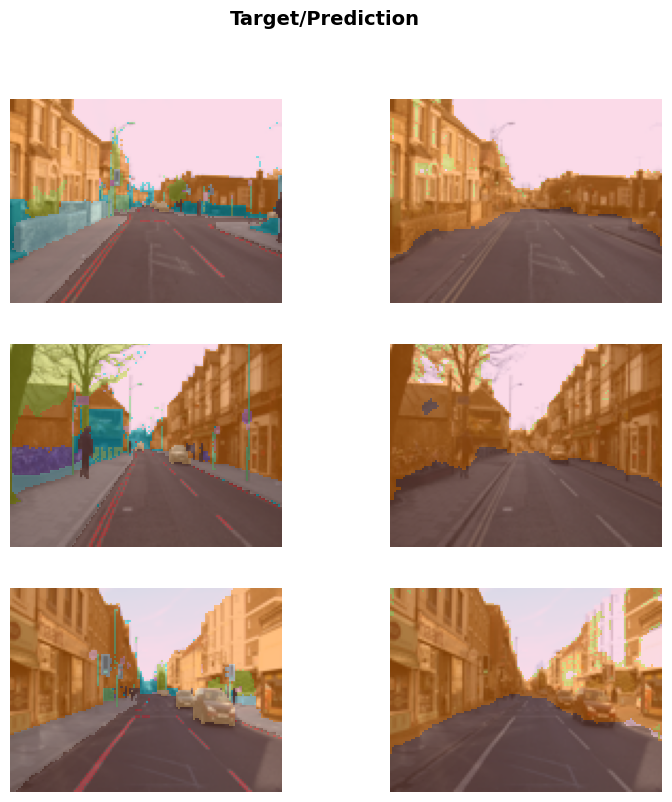

In [7]:
learn.show_results(max_n=3, figsize=(9,9))

In [ ]:
# prompt: python api call and save token in a file

!python -m pip install --upgrade google-auth-oauthlib
!python -m pip install google-auth
!python -m pip install boto3

import os
import json
from google.oauth2 import service_account
from google.auth import jwt

# Load the service account key from the environment variable
service_account_key = os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')

# Create the service account credentials
credentials = service_account.Credentials.from_service_account_file(
    service_account_key, scopes=['https://www.googleapis.com/auth/cloud-platform'])

# Generate the JWT token
token = credentials.create_jwt(
    audience='https://sts.googleapis.com/v1/token',
    expires_in=3600)

# Save the token to a file
with open('token.txt', 'w') as f:
    f.write(token)
